### Blob Detection using Laplacians of Gaussian and scale-space extrema detection

(-0.5, 359.5, 359.5, -0.5)

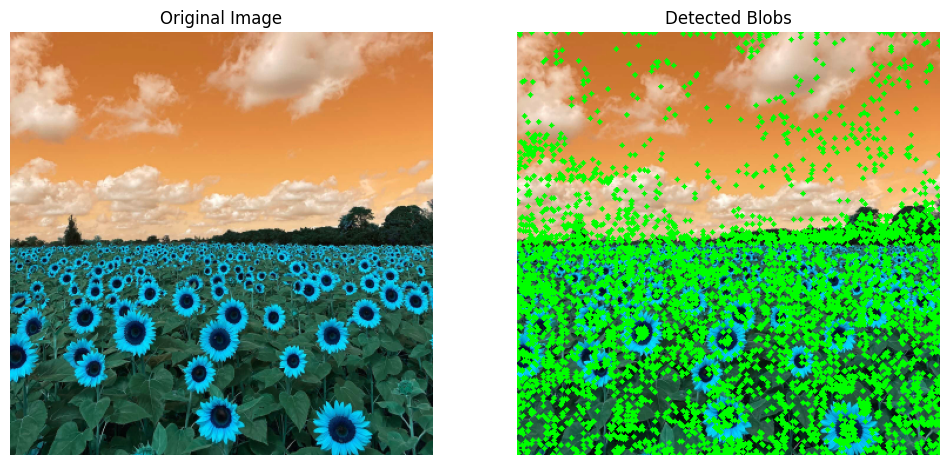

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Load an image
image = cv.imread('Images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Generate blurred images to detect blobs at different scales
sigma_values = np.linspace(1, 50, 10)
blured_images = [cv.GaussianBlur(img_gray, (0, 0), sigma) for sigma in sigma_values]

# Compute the Laplacian of Gaussian 
blobs_log = [cv.Laplacian(img, cv.CV_64F) for img in blured_images]

threshold = 2.98
# Find local extrema across the scale
def blob_detector(images,sigma_values,threshold):
    blobs = []
    blob_radii = []

    for i in range(1, len(images)-1):
        cur, prev, nxt = images[i], images[i-1], images[i+1]
        extrema = np.logical_and(np.logical_and(cur > prev, cur > nxt), cur > threshold)
        y_x = np.argwhere(extrema)  # centers of the blobs
        if y_x.size > 0:
            blobs.append(y_x)
            blob_radii.append(sigma_values[i] * np.sqrt(2))  # Append radii for each detected blob

    return blobs, blob_radii

blobs, blob_radii = blob_detector(blobs_log, sigma_values, threshold)

output_image = image.copy()

# Draw circles around detected blobs
for i, centers in enumerate(blobs):
    for center in centers:
        cv.circle(output_image, (int(center[1]), int(center[0])), 2, (0, 255, 0), -1)

# Display the image with detected blobs
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(output_image, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Detected Blobs')
ax[1].axis('off')

